# Create modelling function

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.style.use('seaborn')

def train_logistics_model(size):
    print(f'Train logistics model with size {size}.')
    
    # Create features and target data
    X = np.random.normal(size=size).reshape(size, 1)
    y = np.vectorize(generate_data)(X).reshape(size, 1)
    
    # Create model
    model = LogisticRegression()
    model.fit(X, y.ravel())
    predictions = model.predict(X)
    
    # Print results
    print('Coefficient: ', model.coef_)
    print('Intercept: ', model.intercept_)
    print('Accuracy', accuracy_score(y, predictions))
    
    # Plot histogram
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 1)
    ax.hist(X, bins=20, alpha=0.5)

    # Plot logistics function based on model coefficient & intercepts
    x = np.linspace(-5, 5, 500)
    loss = compute_prediction(model, x).ravel()
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x, loss, color='red')

    # Plot horizontal and vertical lines for cutoff
    cutting_point = (-1, np.asscalar(compute_prediction(model, -1)))
    print('Cutting point : ', cutting_point)
    ax.vlines(cutting_point[0], -0.1, cutting_point[1], linestyle="dashed")
    ax.hlines(cutting_point[1], -6, cutting_point[0], linestyle="dashed")

    # Configure axes limits and labels
    ax.set_xlim((-5.5, 5.5))
    ax.set_ylim((-0.1, 1.1))
    ax.set_xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5))
    ax.set_yticks((0, 0.25, 0.5, 0.75, 1))
    
    plt.tight_layout()
    plt.show()

def generate_data(x):
    if x <= -1: 
        return 0
    else:
        return 1
        
def logistics(x): 
    return 1 / (1 + np.exp(-x))
    
def compute_prediction(model, x):
    return logistics(x * model.coef_ + model.intercept_)

# Logistic Regression with different data size (100, 1k, 10k & 100k)

Train logistics model with size 100.
Coefficient:  [[ 2.61060203]]
Intercept:  [ 2.8534433]
Accuracy 0.99
Cutting point :  (-1, 0.5604137175927407)


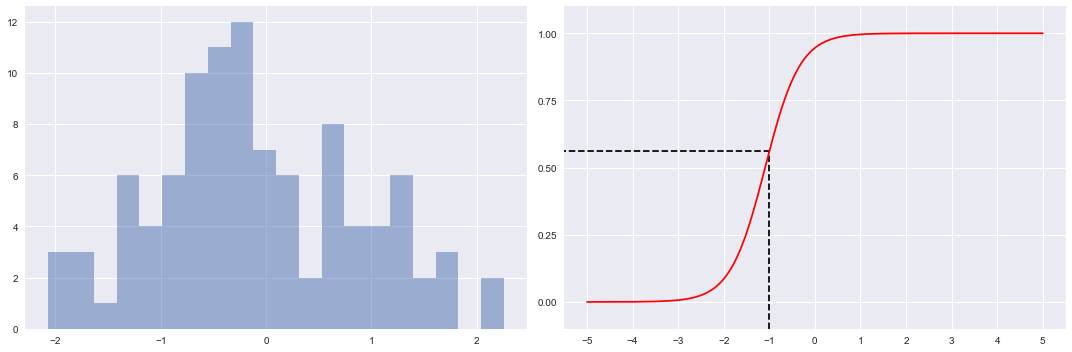

Train logistics model with size 1000.
Coefficient:  [[ 5.87115973]]
Intercept:  [ 5.95503738]
Accuracy 0.996
Cutting point :  (-1, 0.520957125794916)


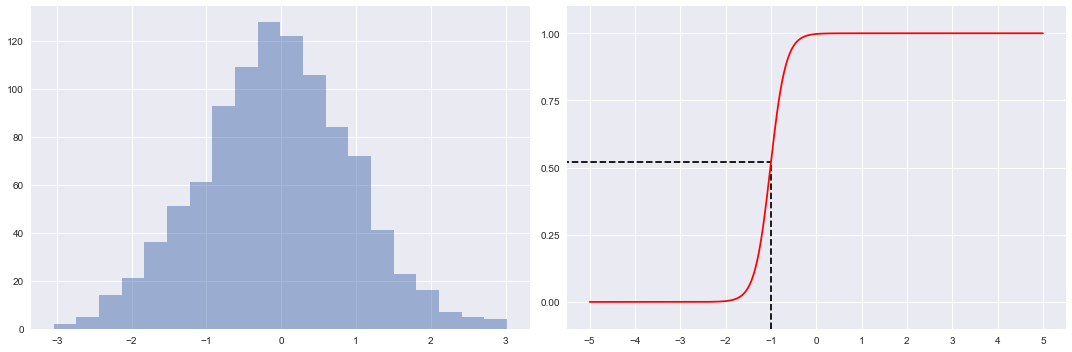

Train logistics model with size 10000.
Coefficient:  [[ 12.55183042]]
Intercept:  [ 12.65073581]
Accuracy 0.9979
Cutting point :  (-1, 0.5247062119059366)


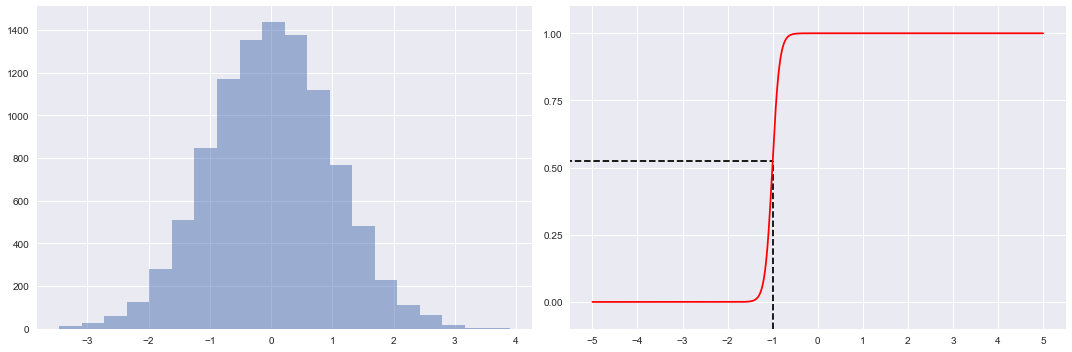

Train logistics model with size 100000.
Coefficient:  [[ 27.0980628]]
Intercept:  [ 27.14312587]
Accuracy 0.99972
Cutting point :  (-1, 0.511263862126629)


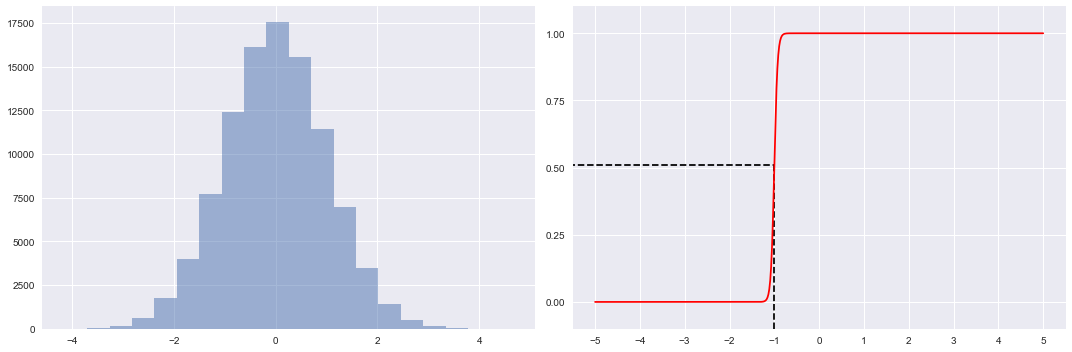

In [2]:
train_logistics_model(100)
train_logistics_model(1000)
train_logistics_model(10000)
train_logistics_model(100000)